## Problem Statment
Santander wants to Identify which customers will make at least one transaction in the future irrespective of the amount. Santander therefore wants a model that will predict future customer transactions with real data provided but unidentified for security purposes.
The data has 200 numerical values of anonimyzed data which will be used to analyse the customer relations with the business.

## Project Planning
### Exploratory Data Analysis
### Data Visualization using Statistical methods
### Implementation of most suitable machine learning algorithm
### Predict and display future comsumer transactions

In [1]:
#IMPORTING NECESSARY PACKAGES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import warnings
from scipy.stats.stats import pearsonr
import itertools
from scipy import stats

In [2]:
# link to data set from Kaggle
#
# https://www.kaggle.com/c/santander-customer-transaction-prediction/data

data = pd.read_csv('train.csv')

In [3]:
data.head(5)

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [4]:
# A DESCRIPTION OF THE DATA SET
data.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [5]:
#CALCULATE NUMBER OF MISSING VALUES IN TRAIN AND TEST DATAFRAMES
def check_null_values(df):
    flag=df.isna().sum().any()
    if flag==True:
        total = df.isnull().sum()
        percent = (df.isnull().sum())/(df.isnull().count()*100)
        output = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
        data_type = []
        for col in df.columns:
            dtype = str(df[col].dtype)
            data_type.append(dtype)
        output['Types'] = data_type
        return(np.transpose(output))
    else:
        return(False)

In [6]:
check_null_values(data)

False

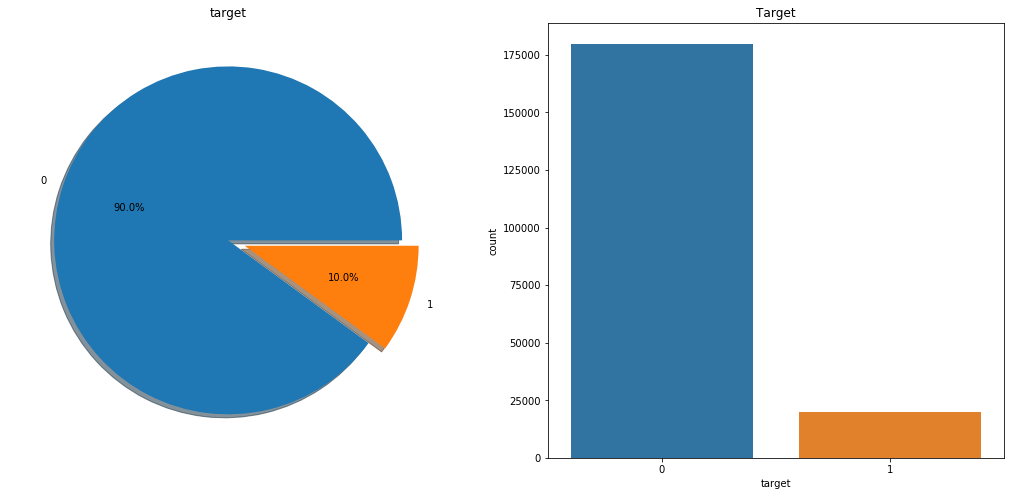

In [7]:
#DISTRIBUTION OF THE TARGET VALUE IN TRAIN DATASET
f,ax=plt.subplots(1,2,figsize=(18,8))
data['target'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('target')
ax[0].set_ylabel('')
sns.countplot('target',data=data,ax=ax[1])
ax[1].set_title('Target')
plt.show()
#SINCE THERE ARE 10.0% VALUES WITH 1, THE DATA IS UNBALANCED WRT TARGET VALUE

<Figure size 432x288 with 0 Axes>

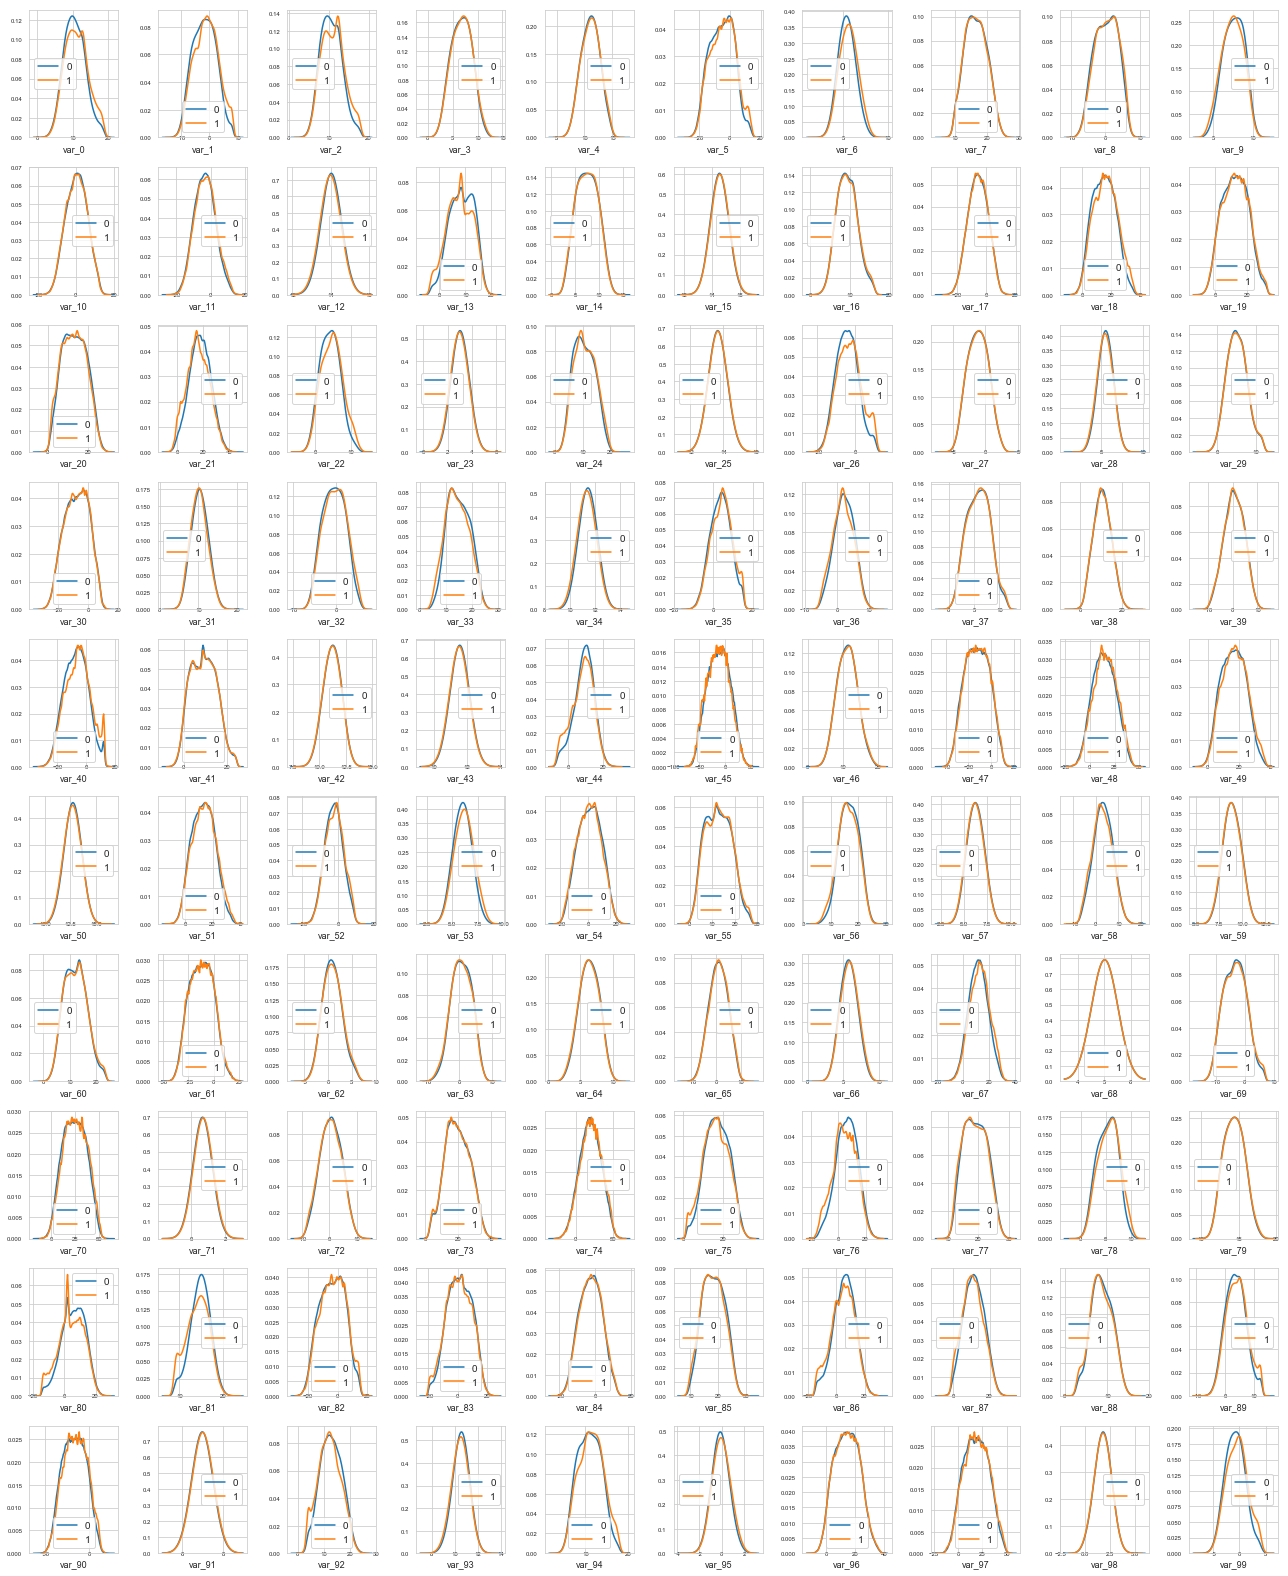

In [8]:
# DENSITY PLOTS OF EACH FEATURE WITH THE TARGET VALUES(0,1) i.e 
# How each feature infleunces the target being a 0 or a 1 using a density graph.

def plot_feature_distribution(df1, df2, label1, label2, features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(10,10,figsize=(18,22))

    for feature in features:
        i += 1
        plt.subplot(10,10,i)
        sns.kdeplot(df1[feature], bw=0.5,label=label1)
        sns.kdeplot(df2[feature], bw=0.5,label=label2)
        plt.xlabel(feature, fontsize=9)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=6, pad=-6)
        plt.tick_params(axis='y', which='major', labelsize=6)
    plt.tight_layout()
    plt.show();
    
t0 = data.loc[data['target'] == 0]
t1 = data.loc[data['target'] == 1]
features_1 = data.columns.values[2:102]
plot_feature_distribution(t0, t1, '0', '1', features_1)

<Figure size 432x288 with 0 Axes>

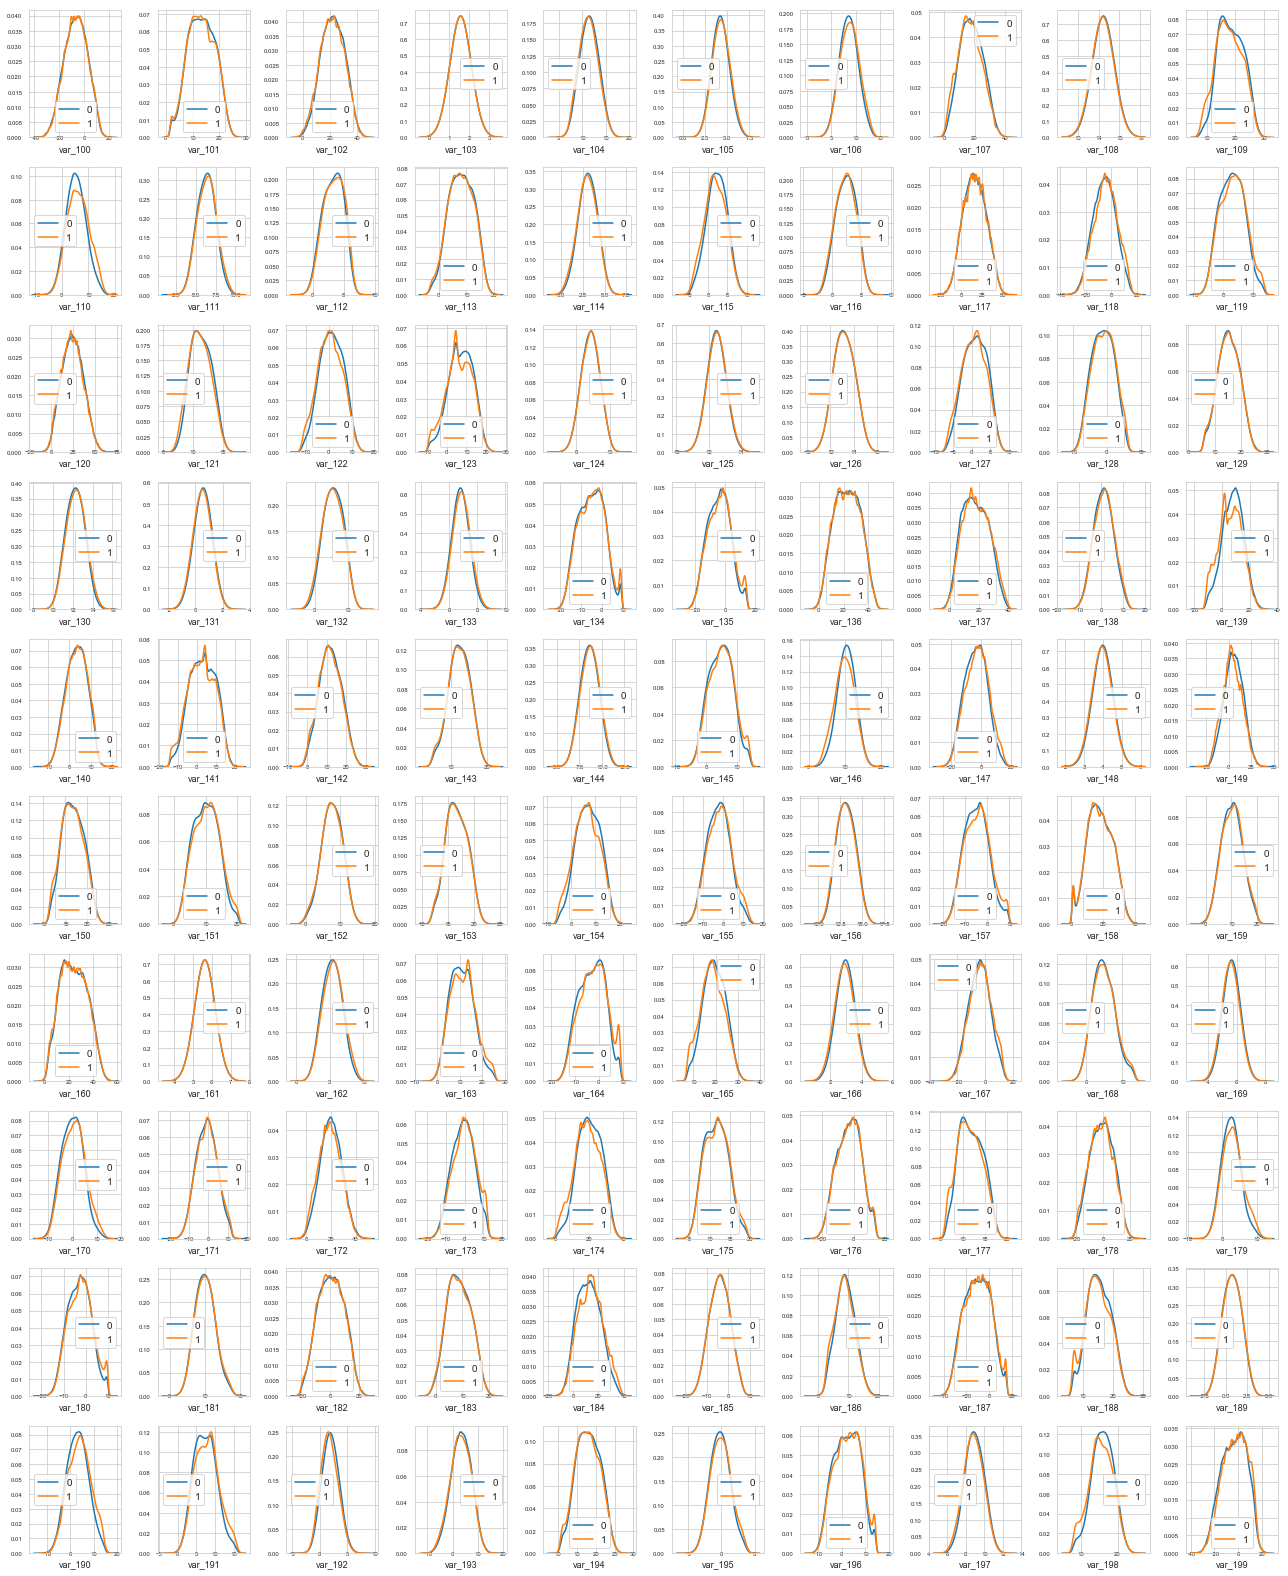

In [9]:
#The last 100 features
features_2 = data.columns.values[102:202]
plot_feature_distribution(t0, t1, '0', '1', features_2)

### Analysing the above Density plots and their infleunce to the target values
- Firstly, since the data contained in the train and test dataframes are similar, analysis was done on the test which applies on the train dataframe as well.
- From these density plot, most of the features have very high standard deviation values which implies the data points are spread out around the mean, i.e very low minimum values and very high maximum values.
- Approximately 5% of these features have very low standard deviations which makes the density plot have peak values at a high probabilistic level of 0.6 which is a great probability of having a customer do a transaction in the future.

### Pearson Correlation 
* From the 200 features, var_91, var_108 and var_148 have the highest probability values from their density plots.
* Applying a pearson correlation on each feature and the target to see their relationship
* considering var_91
* Null hypothesis is: there is a relationship between them
* The alternative hypothesis is there is no relationship between them

In [10]:
stats.pearsonr(data['target'], data['var_91'])
# since r value is < 0.02, the correlation between target and var_91 is a positive weak correlation 
# this implies as var_91 increases, probability of having a customer make future transaction increases too
# Also since the p value is greater than 0.05, the null hypothesis is therefore supported

(0.04012717220493177, 4.584905243978216e-72)

In [11]:
# considering var_108
stats.pearsonr(data['target'], data['var_108'])
# The rvalue being <0.02 and negative shows that there is a weak negative correlation between these variables
# meaning an increase in var_108 causes a decrease in target.

(-0.044791155673649684, 2.4114941651144454e-89)

In [12]:
# considering var_148
stats.pearsonr(data['target'], data['var_148'])
# The rvalue being <0.02 and negative shows that there is a weak negative correlation between these variables

(-0.055011090526584705, 7.677967908958931e-134)

### Pearson correlation analysis
* Var_91 has a positive weak correlation with the target, this implies higher values of var_91 will increase the probability of having a 1.
* var_108 and var_148 both have negative weak correlation with the target. This implies a decrease in any of these values causes a increased probability of having 1.
* This observation gotten from the pearson correlation of var_91 and target can further be used for implementation as an increase in var_91 increases the probability of a customer making a transaction in the future. 
* Measure put to increase this unidentified feature could be a great milestone to the project's aim.

### Training and test datasets.
* Two models are used so the one that produces highest accuracy is therefore termed most suitable for the problem. They are;
* Logistic Regression Model with and without regularization
* Multinomial Naive Bayes Model 
* Conclussions are therefore drawn from the accuracies of  the models.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Reducing the records to the first 20000 records of the dataset as the dataset is too large
data = data.head(20000)
#Before splitting the dataset, verify if X is a matrix and y a vector
X = data.iloc[:, 2:202].values
print("X: ", type(X), X.shape)
y = data.iloc[:, 1].values
print('y: ', type(y), y.shape)

# Split the data into a training and test set.
Xlr, Xtestlr, ylr, ytestlr = train_test_split(data.iloc[:, 2:202].values, 
                                              data.iloc[:, 1].values,random_state=5)

print('Accuracy of the Logistic Regression model on the training and test set')

# solver is specified so as to avoid error message as the solver will change from liblinear to lbfgs in the future
clf = LogisticRegression(solver='liblinear')  
# Fit the model on the trainng data.
clf.fit(Xlr, ylr)
#Accuracy from the training data
y_predict_train = clf.predict(Xlr)
print("[Train] Accuracy score (ylr, y_predict_train):", accuracy_score(ylr, y_predict_train))


X:  <class 'numpy.ndarray'> (20000, 200)
y:  <class 'numpy.ndarray'> (20000,)
Accuracy of the Logistic Regression model on the training and test set
[Train] Accuracy score (ylr, y_predict_train): 0.9148


In [5]:
# Print the accuracy from the testing data.
y_predict_test = clf.predict(Xtestlr)
print("[Test] Accuracy score (y_predict_test, ytestlr):", accuracy_score(y_predict_test, ytestlr))


[Test] Accuracy score (y_predict_test, ytestlr): 0.9112


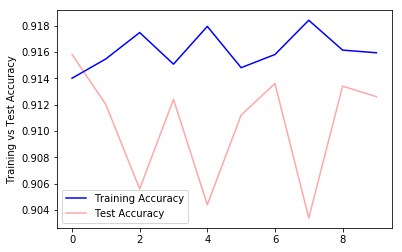

In [8]:
#Since the accuracy difference between the train and test data is not much, therefore there is no model overfitting 
#This difference could also be visualized by plotting a graph of the difference between the train/train accuracy

training_accuracy = []
test_accuracy = []
accuracy_difference = []

#number of trials
n_splits = 10

# loop over multiple trials
for i in range(0, n_splits):
    #split for this iteration, using shuffle and a different random_state 
    # for every iteration
    Xlr, Xtestlr, ylr, ytestlr = train_test_split(data.iloc[:, 2:202].values, 
                                              data.iloc[:, 1].values,random_state=i)
    # fit on the training set
    clf.fit(Xlr, ylr)
    
    # predict on training set
    y_predict_training = clf.predict(Xlr)
    
    # predict on test set
    y_predict_test = clf.predict(Xtestlr)
    
    # save training accuracy for this split
    tr_accuracy = accuracy_score(y_predict_training, ylr)
    training_accuracy.append(tr_accuracy)
    
    # save test accuracy for this split
    tst_accuracy = accuracy_score(y_predict_test, ytestlr)
    test_accuracy.append(tst_accuracy)
    
    # save difference
    accuracy_difference.append(tst_accuracy - tr_accuracy)
    
#Plot of training vs test accuracy 
#This gives a visualization of how large the difference between these two accuracies is
#If there is overfitting or underfitting 
training_plot, = plt.plot(training_accuracy, 'b')
test_plot, = plt.plot(test_accuracy, 'r', alpha = 0.35)
plt.legend([training_plot, test_plot], ['Training Accuracy', 'Test Accuracy'])
plt.ylabel('Training vs Test Accuracy')
plt.show()

* Since the difference between the training and test accuracy scores is not much, this implies there is no model overfitting or underfitting.
* The model is also suitable for this problem as it's accuracy is greater than 90%.

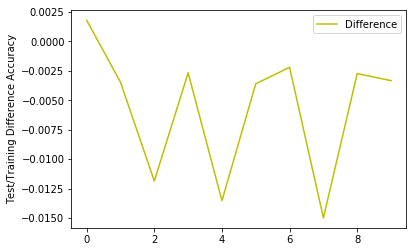

In [9]:
# accuracy difference between the train and test sets plot
diff_plot, = plt.plot(accuracy_difference, 'y')
plt.legend([diff_plot], ['Difference'])
plt.ylabel('Test/Training Difference Accuracy')
plt.show()

#The test accuracy is consistently better with highest increase of 0.03, this therefore serves as a better
# means of visualising the accuracy difference

In [10]:
# printing out classification report
# Precision: Ability of a classiifer not to label an instance positive that is actually negative. 
# Recall: Ability of a classifier to find all positive instances for each class it is defined
# F1 score: Weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0.
#Support: Number of actual occurrences of the class in the specified dataset

from sklearn.metrics import classification_report

print("[Training Classification Report:]")
print(classification_report(ylr, y_predict_training))

print("[Test Classification Report:]")
print(classification_report(ytestlr, y_predict_test))

[Training Classification Report:]
              precision    recall  f1-score   support

           0       0.93      0.99      0.95     13521
           1       0.68      0.27      0.39      1479

   micro avg       0.92      0.92      0.92     15000
   macro avg       0.81      0.63      0.67     15000
weighted avg       0.90      0.92      0.90     15000

[Test Classification Report:]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      4511
           1       0.62      0.27      0.37       489

   micro avg       0.91      0.91      0.91      5000
   macro avg       0.78      0.62      0.66      5000
weighted avg       0.90      0.91      0.90      5000



In [11]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

def cv_score(clf, x, y, score_func=accuracy_score):
    result = 0
    nfold = 5
    for train, test in KFold(nfold).split(x): # split data into train/test groups, 5 times
        clf.fit(x[train], y[train]) # fit
        result += score_func(clf.predict(x[test]), y[test]) # evaluate score function on held-out data
    return result / nfold # average

In [12]:
#the grid of parameters to search over
from sklearn.linear_model import LogisticRegression
weights, params = [], []

Cs = [0.001, 0.1, 1, 10]

for c in Cs:
    
    lr = LogisticRegression(C=c, random_state=0, solver='liblinear')
    lr.fit(Xlr, ylr)
    weights.append(lr.coef_[0])
    params.append(10*c)
    score = cv_score(lr, Xlr, ylr)
    print('For C :', c)
    print('Accuracy score is: ', score)
    print('')

weights = np.array(weights)

For C : 0.001
Accuracy score is:  0.9099999999999999

For C : 0.1
Accuracy score is:  0.9121333333333332

For C : 1
Accuracy score is:  0.9115333333333332

For C : 10
Accuracy score is:  0.9114666666666666



In [13]:
# LGR without regularization 
clf = LogisticRegression(random_state = 0, solver='liblinear')
score = cv_score(clf, Xlr, ylr)
print('Accuracy score without regularization is ', score)

Accuracy score without regularization is  0.9115333333333332


In [14]:
# LGR with l1 regularization and C = 0.1 with highest accuracy score
clf_1 = LogisticRegression(penalty='l1', C=0.1, random_state = 0, solver='liblinear')
score = cv_score(clf_1, Xlr, ylr)
print('Accuracy score with L1 regularization and C=0.1 is ', score)

Accuracy score with L1 regularization and C=0.1 is  0.9124000000000001


In [16]:
# Using the Multinomial Naive Bayes Model
# Tried Multinomial Naive Bayes and had an error of " Input X must be non-negative"
# Decided to use Guassian Naive Bayes

from sklearn.naive_bayes import GaussianNB

X = data.iloc[:, 2:202].values
print("X: ", type(X), X.shape)
y = data.iloc[:, 1].values
print('y: ', type(y), y.shape)

# Split the data into a training and test set.
Xtrain, Xtest, ytrain, ytest = train_test_split(data.iloc[:, 2:202].values, 
                                              data.iloc[:, 1].values,random_state=5)

clf_gnb = GaussianNB()
# Fit the model on the trainng data.
clf_gnb.fit(Xtrain, ytrain)
#Accuracy from the training data
y_predict_train = clf_gnb.predict(Xtrain)
print('Accuracy of the Multinomial Naive Bayes model on the training and test set')
print("[Train] Accuracy score (ylr, y_predict_train):", accuracy_score(ytrain, y_predict_train))

# Print the accuracy from the testing data.
y_predict_test = clf_gnb.predict(Xtestlr)
print("[Test] Accuracy score (y_predict_test, ytestlr):", accuracy_score(y_predict_test, ytest))


# vectorizer = HashingVectorizer(non_negative=True)

X:  <class 'numpy.ndarray'> (20000, 200)
y:  <class 'numpy.ndarray'> (20000,)
Accuracy of the Multinomial Naive Bayes model on the training and test set
[Train] Accuracy score (ylr, y_predict_train): 0.9262
[Test] Accuracy score (y_predict_test, ytestlr): 0.8606


In [17]:
from sklearn.metrics import classification_report

print("[Training Classification Report:]")
print(classification_report(ytrain, y_predict_train))

print("[Test Classification Report:]")
print(classification_report(ytest, y_predict_test))

[Training Classification Report:]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     13521
           1       0.73      0.40      0.52      1479

   micro avg       0.93      0.93      0.93     15000
   macro avg       0.83      0.69      0.74     15000
weighted avg       0.92      0.93      0.92     15000

[Test Classification Report:]
              precision    recall  f1-score   support

           0       0.90      0.95      0.92      4511
           1       0.11      0.06      0.08       489

   micro avg       0.86      0.86      0.86      5000
   macro avg       0.51      0.51      0.50      5000
weighted avg       0.83      0.86      0.84      5000



### Observations and Conclussions from above analysis
* Applying LogisticRegression produces training and test accuracies with high values for one class and smaller values for the other class.
* Gaussian Naive Bayes is not suitable for this problem as there is model overfitting. Though the accuracies are different between the 0 and 1 class, the difference is too great that the algorithm turns to be complex for case.
* A situation where there is an imbalance representation of classes is called Imbalanced Data. Here, the 0 class is 13000 data points morethan the 1 class.This huge difference therefore causes imbalance classes.
* Since Logistic regression has better training and test accuracies, this algorithm is therefore the best for this problem.
* Inoreder to improve this and solve the imbalance data problem, the folowing could be done:
    * Resampling the Dataset: This is done by randomly adding copies of instances from the under-represented class called over-sampling. This is most suitable for the minority class which therefore increases it's number of samples.
    * Generating Synthetic Samples :  SMOTE(Synthetic Minority Oversampling TEchnique) system works by creating synthetic samples from the minor class instead of creating copies. The algorithm selects two or more similar instances (using a distance measure) and perturbing an instance one attribute at a time by a random amount within the difference to the neighboring instances.
    * These measures put in place will reduce the problem of data imbalancing.
* After implementing the techniques above on the imbalanced data, Logistic Regression can therefore be used to better do training and testing of the model which will result in better predictions and accuracies.